In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from textwrap import wrap

In [6]:
#reading the data
file = "../tables/model_input/noc_answers.csv"

data = pd.read_csv(file,index_col=['noc','workshop.number'])
data.sort_index(inplace=True)
data.loc[data.share == 'remain constant','share'] = 'constant'
data.dropna(inplace=True)

In [7]:
y_abs = pd.DataFrame(data['absolute']).pivot_table(index = ['noc','workshop.number'], columns = 'absolute', aggfunc = len).fillna(0)
y_abs['sum'] = y_abs.sum(axis = 1)
y_abs['not_increase'] = y_abs['fewer'] + y_abs['same']
y_abs.loc[:,y_abs.columns!='sum'] = y_abs.loc[:,y_abs.columns!='sum'].divide(y_abs['sum'],axis=0)
y_abs['y'] = y_abs[['fewer','more','same']].idxmax(axis=1)
y_abs['binned_y'] = y_abs[['more','not_increase']].idxmax(axis=1)

y_share = pd.DataFrame(data['share']).pivot_table(index = ['noc','workshop.number'], columns = 'share', aggfunc = len).fillna(0)
y_share['sum'] = y_share.sum(axis = 1)
y_share['not_increase'] = y_share['decrease'] + y_share['constant']
y_share.loc[:,y_share.columns!='sum'] = y_share.loc[:,y_share.columns!='sum'].divide(y_share['sum'],axis=0)
y_share['y'] = y_share[['constant','decrease','increase']].idxmax(axis=1)
y_share['binned_y'] = y_share[['increase','not_increase']].idxmax(axis=1)

In [8]:
work_count = y_share.groupby(level=0).size()
benchmark = work_count[work_count>1].index
regional = work_count[work_count==1].index

In [6]:
overall_share = [
    sum(y_share['increase'].multiply(y_share['sum'])),
    sum(y_share['constant'].multiply(y_share['sum'])),
    sum(y_share['decrease'].multiply(y_share['sum']))
                ]
overall_abs = [
    sum(y_abs['more'].multiply(y_share['sum'])),
    sum(y_abs['same'].multiply(y_share['sum'])),
    sum(y_abs['fewer'].multiply(y_share['sum']))
                ]

In [16]:
print(overall_abs)
print(overall_share)

[977.0, 589.0, 854.0]
[768.0, 707.0, 945.0]


In [12]:
y_share.to_csv('aggregate_answers_share.csv')
y_abs.to_csv('aggregate_answers_abs.csv')

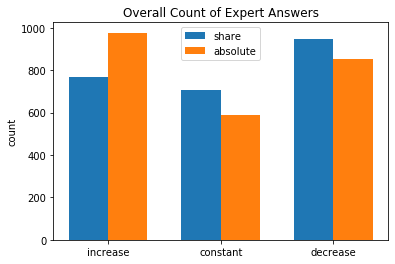

In [8]:
ind = np.arange(len(overall_share))  # the x locations for the groups
width = 0.35  # the width of the bars

fig,ax = plt.subplots()
rects1 = ax.bar(ind - width/2, overall_share, width, label='share')
rects2 = ax.bar(ind + width/2, overall_abs, width,label='absolute')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Overall Count of Expert Answers')
ax.set_xticks(ind)
ax.set_xticklabels(('increase', 'constant', 'decrease'))
ax.legend()

plt.savefig('overal_count.png')
plt.show()

In [3]:
cross_count = data['absolute'].str.cat(data['share'], sep =", ").value_counts().sort_index()
cross_count = np.matrix([cross_count[[5,3,4]],cross_count[[8,6,7]],cross_count[[2,0,1]]])

In [4]:
cross_count

matrix([[722, 223,  32],
        [ 37, 419, 133],
        [  9,  65, 780]], dtype=int64)

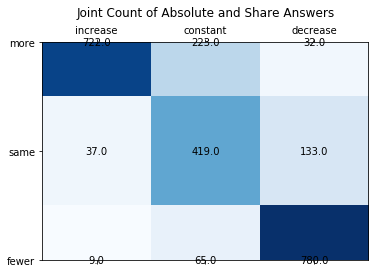

In [9]:
fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(cross_count, cmap='Blues')

abs_labels = ['more','same','fewer']
y_pos = np.arange(len(abs_labels))
share_labels = ['increase', 'constant', 'decrease']
x_pos = np.arange(len(share_labels))

plt.yticks(y_pos,abs_labels)
plt.xticks(x_pos,share_labels)
ax.set_title('Joint Count of Absolute and Share Answers',pad=15)

for (i, j), z in np.ndenumerate(cross_count):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.savefig('matrix_of_answers.png')
plt.show()

In [10]:
share_increase_std = y_share.loc[benchmark].groupby(level=0).std()['increase'].sort_values(ascending=False)
abs_increase_std = y_abs.loc[benchmark].groupby(level=0).std()['more'].sort_values(ascending=False)

share_decrease_std = y_share.loc[benchmark].groupby(level=0).std()['decrease'].sort_values(ascending=False)
abs_decrease_std = y_abs.loc[benchmark].groupby(level=0).std()['fewer'].sort_values(ascending=False)

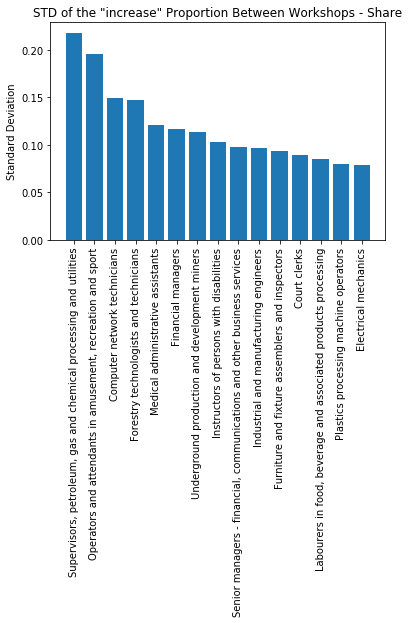

In [11]:
fig, ax = plt.subplots()
plt.bar(share_increase_std.index,share_increase_std)
plt.xticks(rotation=90)
ax.set_ylabel('Standard Deviation')
ax.set_title('STD of the "increase" Proportion Between Workshops - Share')

plt.savefig('STD_abs.png')
plt.show()

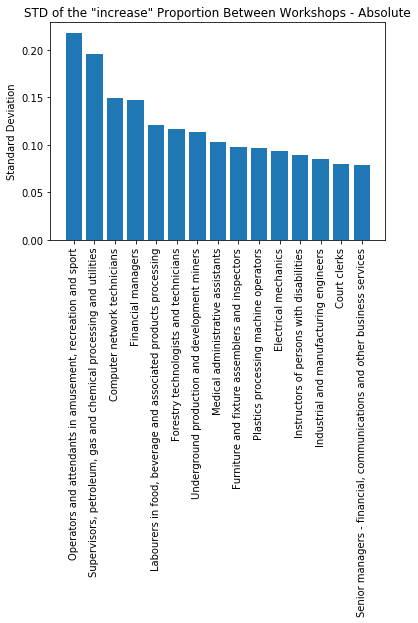

In [12]:
fig, ax = plt.subplots()
plt.bar(abs_increase_std.index,share_increase_std)
plt.xticks(rotation=90)
ax.set_ylabel('Standard Deviation')
ax.set_title('STD of the "increase" Proportion Between Workshops - Absolute')

plt.savefig('STD_share.png')
plt.show()

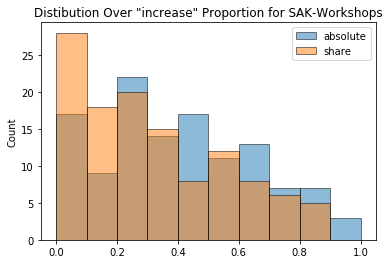

In [13]:
#distibution over proportion of increase
bins=np.histogram(np.hstack((y_abs['more'],y_share['increase'])), bins=10)[1]

fig, ax = plt.subplots()
plt.hist(y_abs['more'],bins, alpha = 0.5, edgecolor = 'black',label='absolute')
plt.hist(y_share['increase'],bins, alpha = 0.5, edgecolor = 'black',label='share')
plt.legend(loc='upper right')
ax.set_ylabel('Count')
ax.set_title('Distibution Over "increase" Proportion for SAK-Workshops')

plt.savefig('dist_increase.png')
plt.show()

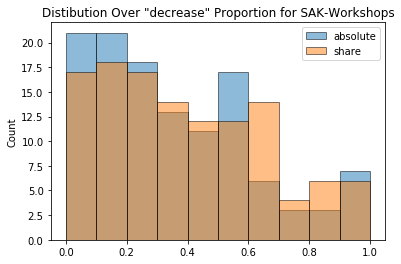

In [14]:
bins=np.histogram(np.hstack((y_abs['fewer'],y_share['decrease'])), bins=10)[1]

fig, ax = plt.subplots()
plt.hist(y_abs['fewer'],bins, alpha = 0.5, edgecolor = 'black',label='absolute')
plt.hist(y_share['decrease'],bins, alpha = 0.5, edgecolor = 'black',label='share')
plt.legend(loc='upper right')
ax.set_ylabel('Count')
ax.set_title('Distibution Over "decrease" Proportion for SAK-Workshops')

plt.savefig('dist_decrease.png')
plt.show()

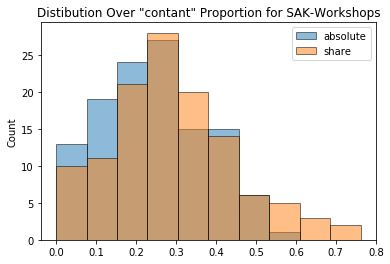

In [15]:
bins=np.histogram(np.hstack((y_abs['same'],y_share['constant'])), bins=10)[1]

fig, ax = plt.subplots()
plt.hist(y_abs['same'],bins, alpha = 0.5, edgecolor = 'black',label='absolute')
plt.hist(y_share['constant'],bins, alpha = 0.5, edgecolor = 'black',label='share')
plt.legend(loc='upper right')
ax.set_ylabel('Count')
ax.set_title('Distibution Over "contant" Proportion for SAK-Workshops')

plt.savefig('dist_constant.png')
plt.show()

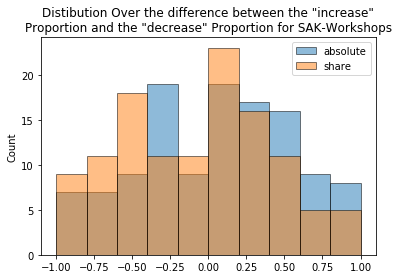

In [16]:
abs_sway = y_abs['more']-y_abs['fewer']
share_sway = y_share['increase']-y_share['decrease']

bins=np.histogram(np.hstack((abs_sway,share_sway)), bins=10)[1]

fig, ax = plt.subplots()
plt.hist(abs_sway,bins, alpha = 0.5, edgecolor = 'black',label='absolute')
plt.hist(share_sway,bins, alpha = 0.5, edgecolor = 'black',label='share')
plt.legend(loc='upper right')
ax.set_ylabel('Count')
ax.set_title("\n".join(wrap("Distibution Over the difference between the \"increase\" Proportion and the \"decrease\" Proportion for SAK-Workshops", 60)))

plt.savefig('dist_increase_decrease.png')
plt.show()

In [10]:
workshops = {
    1:'Calgary',
    2:'Toronto',
    3:'Whitehorse',
    4:'Vancouver',
    5:'Montreal',
    6:'St Johns'
}
y_share.reset_index(level=1,inplace=True)
y_share['workshop.number'].replace(workshops,inplace=True)
y_share.set_index('workshop.number',append =True,inplace=True)

In [13]:
WS_means

workshop.number
Montreal      0.240000
Calgary       0.273016
St Johns      0.304348
Vancouver     0.305263
Toronto       0.333333
Whitehorse    0.350000
Name: increase, dtype: float64

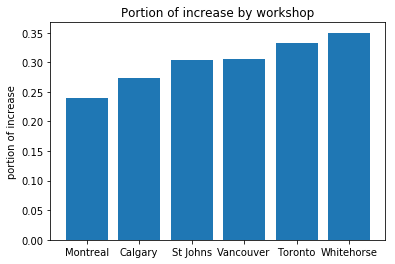

In [12]:
#######this is wrong!##########

WS_means = y_share.loc[benchmark].groupby(level=1).mean()['increase'].sort_values()
plt.bar(WS_means.index,WS_means)
plt.ylabel('portion of increase')
plt.title('Portion of increase by workshop')
plt.savefig('overall benchmark differences.png')
plt.show()

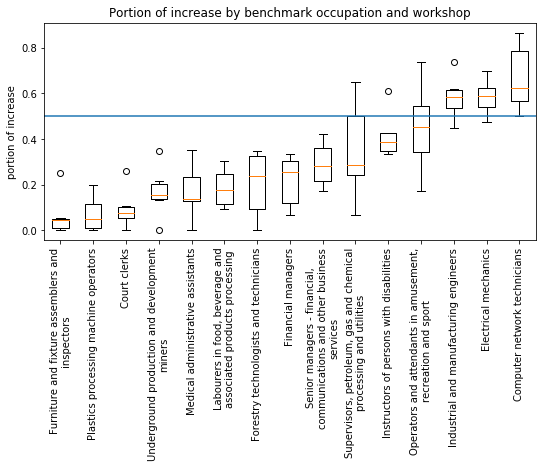

In [68]:
benchmark_portions = y_share.loc[benchmark]['increase'].unstack(level=0).T
benchmark_portions['mean']=benchmark_portions.mean(axis=1)
benchmark_portions = benchmark_portions.sort_values('mean').drop('mean', axis=1)
occ_labels = [ '\n'.join(wrap(l, 40)) for l in benchmark_portions.index ]

plt.boxplot(benchmark_portions)
plt.xticks(ticks = range(1,16),labels = occ_labels,rotation=90)
plt.ylabel('portion of increase')
plt.title('Portion of increase by benchmark occupation and workshop')
plt.axhline(y=0.5)

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*15+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.savefig('cat_whisker_regional.png')
plt.show()

In [69]:
benchmark_portions.index

Index(['Furniture and fixture assemblers and inspectors',
       'Plastics processing machine operators', 'Court clerks',
       'Underground production and development miners',
       'Medical administrative assistants',
       'Labourers in food, beverage and associated products processing',
       'Forestry technologists and technicians', 'Financial managers',
       'Senior managers - financial, communications and other business services',
       'Supervisors, petroleum, gas and chemical processing and utilities',
       'Instructors of persons with disabilities',
       'Operators and attendants in amusement, recreation and sport',
       'Industrial and manufacturing engineers', 'Electrical mechanics',
       'Computer network technicians'],
      dtype='object', name='noc')

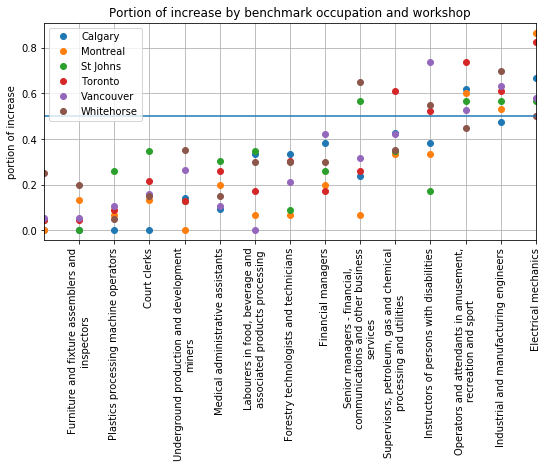

In [66]:
benchmark_portions = y_share.loc[benchmark]['increase'].unstack(level=0).T
benchmark_portions['mean']=benchmark_portions.mean(axis=1)
benchmark_portions = benchmark_portions.sort_values('mean').drop('mean', axis=1)
occ_labels = [ '\n'.join(wrap(l, 40)) for l in benchmark_portions.index ]

plt.plot(benchmark_portions,'o')
plt.xticks(ticks = range(1,16),labels = occ_labels,rotation=90)
plt.ylabel('portion of increase')
plt.title('Portion of increase by benchmark occupation and workshop')
plt.legend(benchmark_portions.columns)
plt.axhline(y=0.5)
plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*15+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.savefig('workshop differences.png')
plt.show()

In [20]:
y_share.loc[benchmark]['increase'].groupby(level=1).std()

workshop.number
Calgary       0.226569
Montreal      0.251724
St Johns      0.195825
Toronto       0.259138
Vancouver     0.235544
Whitehorse    0.188035
Name: increase, dtype: float64